In [1]:
import numpy as np
from wingstructure.structure2 import SectionBase, Layer, BoxSpar
from wingstructure.material import IsotropicMaterial as Material

# Werkstoffe definieren

In [2]:
balsa_schwer = Material(ρ=0.3e3, E=210e3, G=80e3)
balsa_mittel = Material(ρ=0.18e3, E=210e3, G=80e3)
balsa_leicht = Material(ρ=0.16e3, E=210e3, G=80e3)
gfk_rovings  = Material(ρ=1.225, E=210e3, G=80e3)
gfk_gewebe   = Material(ρ=1.225, E=210e3, G=80e3)

# Geometrie definieren

## Profilkoordinaten einlesen

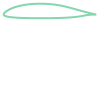

In [3]:
coords = np.loadtxt('airfoils/ah93157.dat', skiprows=1)*1.2
sektion = SectionBase(coords)
sektion

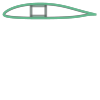

In [4]:
außenlage = Layer(sektion, gfk_gewebe, 3e-3)
kastenholm = BoxSpar(außenlage, {'flange': gfk_rovings, 'web': balsa_mittel},
                                0.45, 0.200, 3e-2, 1e-2)
l3 = Layer(kastenholm, balsa_schwer, 3e-3)
sektion

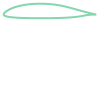

In [5]:
import triangle

außenlage.geometry.exterior

In [6]:
t1 = triangle.triangulate({'vertices':np.array(außenlage.geometry.exterior)})

In [7]:
außen = np.array(außenlage.geometry.exterior)[:-1,:]
innen = np.array(außenlage.geometry.interiors[0])[:-1,:]
alle = np.vstack((außen,innen))

#t2 = triangle.triangulate({'vertices':alle}, 'l')

In [8]:
len(außen)

119

In [9]:
segments = [(ii-1,ii) for ii in range(außen.shape[0])]
segments[0] = (len(außen)-1,0)
segments = np.array(segments)
segments2 = [(len(außen)+ii-1,len(außen)+ii) for ii in range(innen.shape[0])]
segments2[0] = (len(außen)+len(innen)-1,len(außen))
segments2 = np.array(segments2)
holes = np.array([[0.52677947, 0.03213577]])
t2 = triangle.triangulate({'vertices':alle, 'segments':np.vstack((segments,segments2)),
                          'holes':holes},'pC')

In [10]:
t2.keys()

dict_keys(['vertices', 'segments', 'holes', 'triangles', 'vertex_markers', 'segment_markers'])

(-0.1, 0.5)

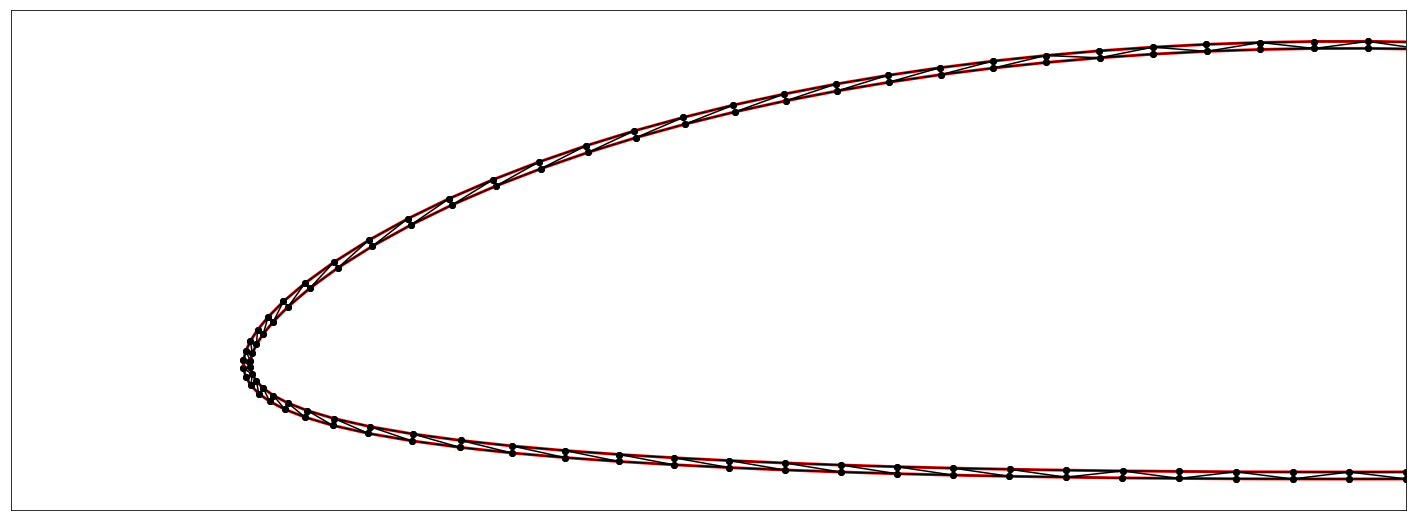

In [11]:
%matplotlib inline
import triangle.plot as plot
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,15))
ax = plt.subplot(111)
plot.plot(ax, **t2)
plt.xlim(-0.1,0.5)

In [12]:
np.array(außenlage.interior.centroid)

array([0.58173056, 0.02834634])

In [13]:
vertices = t2['vertices']
triangles = [[vertices[i] for i in t] for t in t2['triangles']]

In [14]:
def longest_last_clockwise(triangle):
    triangle = sorted(triangle, key=lambda v: np.arctan2(v[1],v[0]), reverse=False)
    a,b,c = triangle
    
    atob = np.linalg.norm(a - b)
    btoc = np.linalg.norm(b - c)
    ctoa = np.linalg.norm(c - a)
    
    longest = max([atob, btoc, ctoa])
    
    if longest == atob:
        return np.array([b,c,a])
    elif longest == btoc:
        return np.array([c,a,b])
    else:
        return np.array([a,b,c])

In [15]:
fürmoni = [longest_last_clockwise(t) for t in triangles]